In [1]:
!pip install scikit-learn==1.3.2 lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
import lightgbm as lgb
from joblib import dump
import itertools
import matplotlib.pyplot as plt
import numpy as np
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [4]:
rice_df = pd.read_excel('/content/rice_w2vec_4mer_dataset.xlsx')

In [5]:
df_cold = rice_df.query('stress == "-" or stress == "cold"').replace('-', 0).replace('cold', 1)

### Training and test models

In [6]:
# Define X and y (target) variables
X = df_cold.drop(['circName', 'stress', 'tissue','chr','start','end','strand','start_anno', 'circID',	'gene', 'isoform', 'width', 'detection_score', 'stress_detection_score', 'end_anno', 'antisense', 'algorithm', 'seq', 'exonSeq', 'predAA', 'miRNA','superCircRNARegion'], axis=1)
y = df_cold['stress']

In [7]:
X.head(2)

,wc_4mer_1,wc_4mer_2,wc_4mer_3,wc_4mer_4,wc_4mer_5,wc_4mer_6,wc_4mer_7,wc_4mer_8,wc_4mer_9,wc_4mer_10,...,wc_4mer_247,wc_4mer_248,wc_4mer_249,wc_4mer_250,wc_4mer_251,wc_4mer_252,wc_4mer_253,wc_4mer_254,wc_4mer_255,wc_4mer_256
0,-7.03,3.89,-3.41,19.99,-7.58,14.46,5.79,4.07,-18.32,-10.78,...,0.23,-13.99,4.97,-10.46,5.52,5.79,-4.05,16.67,11.18,-4.66
1,-11.00,-10.42,16.46,-88.31,1.41,-58.91,52.35,6.18,-41.47,-64.47,...,134.44,10.04,-8.81,46.56,-58.96,55.19,37.83,25.29,23.79,-36.15


In [15]:
y.value_counts()

,count
stress,
0,50187
1,5724


In [16]:
ros = RandomUnderSampler(sampling_strategy=0.7)

X_res, y_res = ros.fit_resample(X, y)

In [17]:
y_res.value_counts()

,count
stress,
0,8177
1,5724


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=200)

In [12]:
clf = LazyClassifier(predictions=True, random_state=200)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [05:54<00:12, 12.77s/it]

[LightGBM] [Info] Number of positive: 4565, number of negative: 6555
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65280
[LightGBM] [Info] Number of data points in the train set: 11120, number of used features: 256
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410522 -> initscore=-0.361810
[LightGBM] [Info] Start training from score -0.361810


100%|██████████| 29/29 [06:01<00:00, 12.46s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.72,0.72,0.72,0.72,65.71
LGBMClassifier,0.72,0.71,0.71,0.72,6.59
ExtraTreesClassifier,0.72,0.70,0.70,0.72,6.82
XGBClassifier,0.71,0.70,0.70,0.71,13.12
RandomForestClassifier,0.71,0.69,0.69,0.71,32.12
SVC,0.70,0.69,0.69,0.70,47.04
AdaBoostClassifier,0.69,0.68,0.68,0.69,32.93
LinearSVC,0.70,0.68,0.68,0.69,22.63
LogisticRegression,0.69,0.67,0.67,0.69,0.82


In [19]:
model_lgb = lgb.LGBMClassifier(random_state=200)
model_lgb.fit(X_train, y_train)

y_pred_lgb = model_lgb.predict(X_test)
report = classification_report(y_test, y_pred_lgb)
print(report)

[LightGBM] [Info] Number of positive: 4565, number of negative: 6555
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65280
[LightGBM] [Info] Number of data points in the train set: 11120, number of used features: 256
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410522 -> initscore=-0.361810
[LightGBM] [Info] Start training from score -0.361810
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1622
           1       0.69      0.64      0.67      1159

    accuracy                           0.73      2781
   macro avg       0.72      0.72      0.72      2781
weighted avg       0.73      0.73      0.73      2781



In [20]:
from sklearn.ensemble import RandomForestClassifier

modelrf = RandomForestClassifier(random_state=200)
modelrf.fit(X_train, y_train)

y_pred_rf = modelrf.predict(X_test)
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1622
           1       0.71      0.59      0.65      1159

    accuracy                           0.73      2781
   macro avg       0.73      0.71      0.71      2781
weighted avg       0.73      0.73      0.73      2781



In [21]:
dump(model_lgb, 'lgb_model_cold_4mer.joblib')
print('LGB - Cold Model created.')

LGB - Cold Model created.


In [22]:
dump(modelrf, 'rf_model_cold_4mer.joblib')
print('RF - Cold Model created.')

RF - Cold Model created.


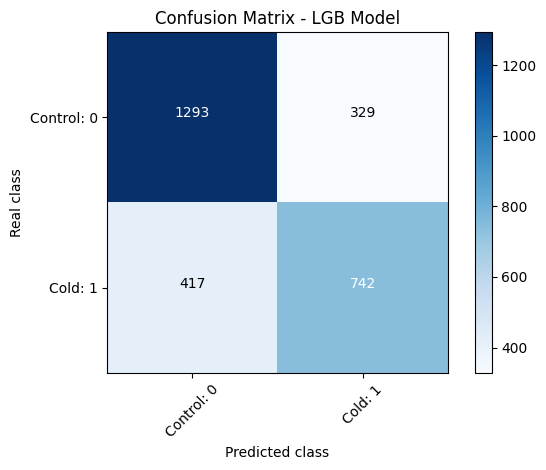

In [23]:
cnf_matrix = confusion_matrix(y_test, y_pred_lgb)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix - LGB Model',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #plt.ylim(0.5, 0.5)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylim(1.5, -0.5)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real class')
    plt.xlabel('Predicted class')
    plt.tight_layout()

plot_confusion_matrix(cnf_matrix, classes=['Control: 0', 'Cold: 1'])

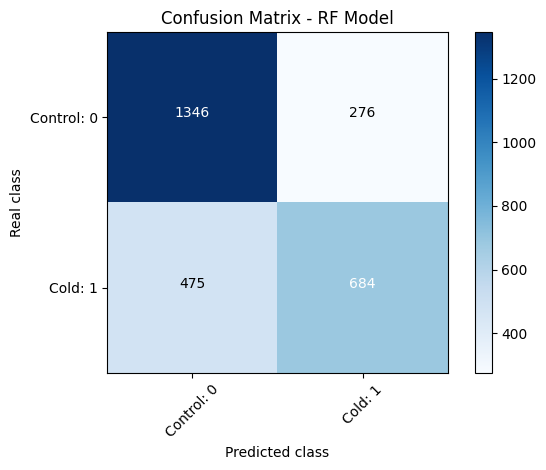

In [24]:
cnf_matrix = confusion_matrix(y_test, y_pred_rf)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix - RF Model',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #plt.ylim(0.5, 0.5)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylim(1.5, -0.5)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real class')
    plt.xlabel('Predicted class')
    plt.tight_layout()

plot_confusion_matrix(cnf_matrix, classes=['Control: 0', 'Cold: 1'])